## Stock Market Analysis and Prediction using LSTM

In [5]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For downloading stock data
import yfinance as yf
from datetime import datetime

# Set up visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [473]:
#Fetching Stock Data

In [9]:

# Define the auto stock tickers and their Corresponding company names
auto_list = ['F', 'TM', 'VWAGY']
company_name = ['Ford', 'Toyota', 'Volkswagen']

# Define start and end dates
start = datetime(2019, 1, 1)
end = datetime(2025, 1, 1)

# Download stock data and assign to individual variables
f = yf.download("F", start, end)
TM = yf.download("TM", start, end)
VWAGY = yf.download("VWAGY", start, end)

# Create a list of DataFrames for each company
company_list = [f, TM, VWAGY]

# Add 'Name_Of_Company' column to each DataFrame
for company, com_name in zip(company_list, company_name):
    company["Name_Of_Company"] = com_name

# Combine all data into a single DataFrame
df = pd.concat(company_list, axis=0)

df.head(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2019-01-02,7.53,8.02,7.48,7.90,5.936495,47494400,Ford
2019-01-03,7.97,7.99,7.78,7.78,5.846321,39172400,Ford
2019-01-04,7.91,8.12,7.85,8.08,6.071757,43039800,Ford
2019-01-07,8.11,8.37,8.03,8.29,6.229562,40729400,Ford
2019-01-08,8.42,8.54,8.35,8.37,6.289679,45644000,Ford
2019-01-09,8.45,8.77,8.36,8.72,6.552688,48404900,Ford
2019-01-10,8.71,8.77,8.45,8.67,6.515115,39490400,Ford
2019-01-11,8.77,8.93,8.70,8.82,6.627833,41559900,Ford
2019-01-14,8.80,9.06,8.76,8.99,6.755581,44833800,Ford


Open: The price at which a stock starts trading at the beginning of the day.

High: The highest price the stock reaches during the day.

Low: The lowest price the stock drops to during the day.

Close: The price of the stock when the market closes for the day.

Adj Close (Adjusted Close): A modified closing price that considers things like dividends, stock splits, or mergers to give a more accurate value over time.

Volume: The total number of shares bought and sold in a day. It shows how actively a stock is being traded.


In [11]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2024-12-17,9.23,9.35,9.22,9.32,9.32,469800,Volkswagen
2024-12-18,9.39,9.44,9.16,9.22,9.22,466000,Volkswagen
2024-12-19,9.37,9.37,9.15,9.15,9.15,489000,Volkswagen
2024-12-20,9.40,9.71,9.16,9.41,9.41,465200,Volkswagen
2024-12-23,9.13,9.30,9.09,9.29,9.29,415900,Volkswagen
2024-12-24,9.26,9.31,9.25,9.31,9.31,171700,Volkswagen
2024-12-26,9.30,9.37,9.20,9.29,9.29,436200,Volkswagen
2024-12-27,9.44,9.49,9.40,9.43,9.43,427300,Volkswagen
2024-12-30,9.42,9.48,9.36,9.36,9.36,759600,Volkswagen


In [13]:
#basic statistical result of the datas.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4.530000e+03
mean,63.003461,63.404618,62.566313,62.994418,61.124033,2.124093e+07
std,69.782253,70.121347,69.396429,69.770618,70.953823,3.502425e+07
min,4.270000,4.420000,3.960000,4.010000,3.268044,2.420000e+04
25%,12.390000,12.552500,12.230000,12.390000,11.130608,1.893250e+05
50%,17.590000,17.716000,17.469999,17.595000,14.249417,3.401500e+05
75%,135.199997,136.082504,134.257496,135.115005,135.115005,4.294985e+07
max,255.000000,255.229996,253.589996,254.770004,254.770004,3.116452e+08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4530 entries, 2019-01-02 to 2024-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             4530 non-null   float64
 1   High             4530 non-null   float64
 2   Low              4530 non-null   float64
 3   Close            4530 non-null   float64
 4   Adj Close        4530 non-null   float64
 5   Volume           4530 non-null   int64  
 6   Name_Of_Company  4530 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 283.1+ KB


In [17]:
df.isna().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Name_Of_Company    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
# Now display Volkswagen data alone
VWAGY.head(10)

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2019-01-02,15.315000,15.510000,15.295000,15.478000,11.152327,94200,Volkswagen
2019-01-03,15.410000,15.500000,15.370000,15.450000,11.132152,90100,Volkswagen
2019-01-04,15.760000,16.084999,15.730000,16.020000,11.542852,106500,Volkswagen
2019-01-07,16.264999,16.350000,16.170000,16.242001,11.702810,158100,Volkswagen
2019-01-08,16.610001,16.638000,16.379999,16.444000,11.848356,106900,Volkswagen
2019-01-09,16.910000,17.059999,16.820000,16.959999,12.220148,140100,Volkswagen
2019-01-10,16.750000,16.916000,16.709999,16.870001,12.155302,263700,Volkswagen
2019-01-11,16.629999,16.714001,16.559999,16.660000,12.003990,123000,Volkswagen
2019-01-14,16.620001,16.850000,16.618000,16.850000,12.140891,75600,Volkswagen


In [23]:
#Volkswagen datas excluding weekends.
VWAGY.shape

(1510, 7)

In [25]:
VWAGY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,19.077813,19.253742,18.899179,19.083095,15.133027,3.258025e+05
std,6.638062,6.755545,6.544769,6.655198,4.527368,5.181628e+05
min,8.650000,8.690000,8.570000,8.620000,7.695234,2.420000e+04
25%,15.175000,15.282500,15.035000,15.118500,12.179971,1.323250e+05
50%,17.250000,17.350000,17.118000,17.250000,13.879941,2.369000e+05
75%,20.047500,20.240000,19.875000,20.067500,15.760632,3.894250e+05
max,42.099998,48.720001,37.700001,42.330002,31.505112,1.189800e+07


In [27]:
VWAGY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1510 non-null   float64
 1   High             1510 non-null   float64
 2   Low              1510 non-null   float64
 3   Close            1510 non-null   float64
 4   Adj Close        1510 non-null   float64
 5   Volume           1510 non-null   int64  
 6   Name_Of_Company  1510 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


In [29]:
VWAGY.isna().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Name_Of_Company    0
dtype: int64

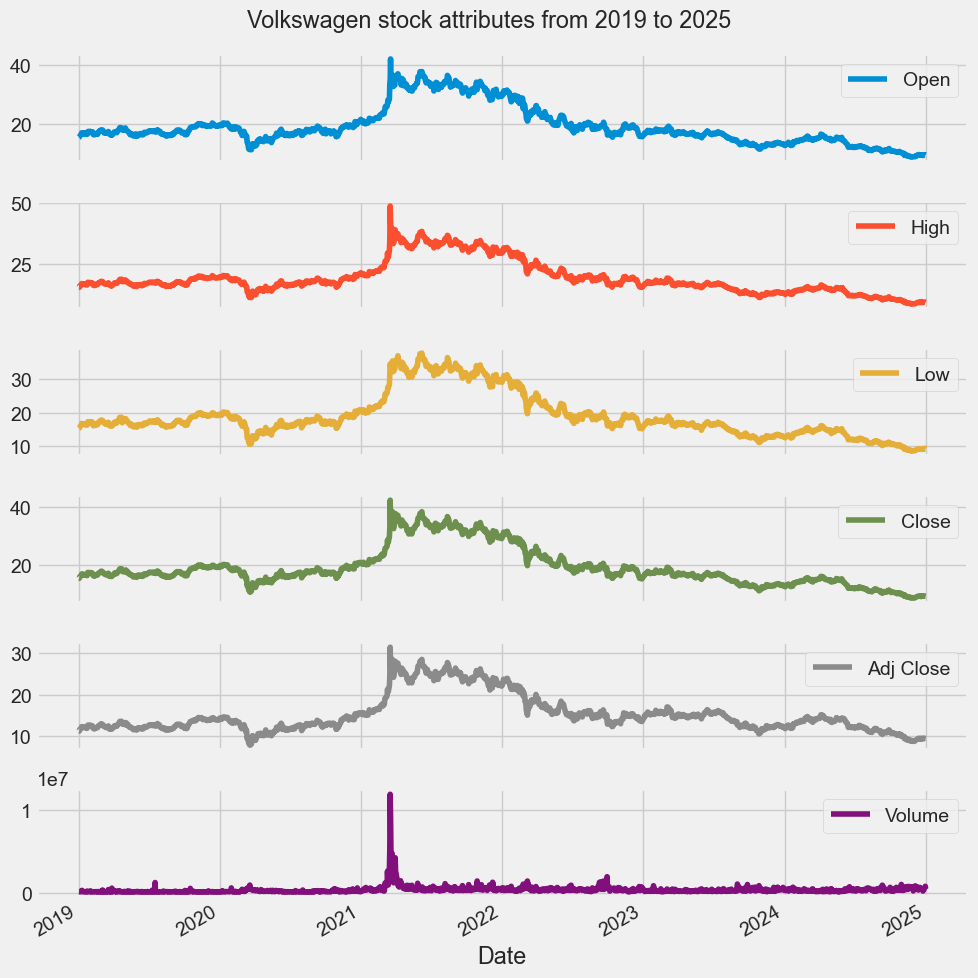

In [35]:
# Filter data for the date range and plot all columns as subplots
VWAGY.plot(subplots=True, figsize=(10, 10), title='Volkswagen stock attributes from 2019 to 2025')

# Display the plot
plt.tight_layout()     #Adjusts spacing between subplots to prevent overlapping.
plt.show()

In [37]:
# Display Toyota data
TM.head(10)

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2019-01-02,114.680000,116.529999,114.680000,116.279999,116.279999,169900,Toyota
2019-01-03,115.849998,116.279999,114.290001,114.650002,114.650002,309500,Toyota
2019-01-04,117.940002,120.169998,117.510002,119.730003,119.730003,307500,Toyota
2019-01-07,120.709999,122.180000,120.320000,121.279999,121.279999,156100,Toyota
2019-01-08,123.160004,123.480003,121.959999,122.309998,122.309998,150400,Toyota
2019-01-09,122.849998,123.300003,122.389999,122.919998,122.919998,139800,Toyota
2019-01-10,123.709999,124.580002,123.269997,124.489998,124.489998,202900,Toyota
2019-01-11,125.010002,125.519997,124.879997,125.070000,125.070000,135500,Toyota
2019-01-14,124.540001,126.099998,124.489998,125.389999,125.389999,156600,Toyota


In [39]:
TM.shape

(1510, 7)

In [41]:
TM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,158.380152,159.236311,157.423629,158.349722,158.349722,2.516077e+05
std,29.620853,29.784277,29.432011,29.636710,29.636710,1.349527e+05
min,110.000000,112.510002,108.010002,108.500000,108.500000,5.060000e+04
25%,135.199997,136.117504,134.282497,135.130005,135.130005,1.629250e+05
50%,153.485001,154.200005,152.394997,153.385002,153.385002,2.239500e+05
75%,178.372505,179.410004,177.470001,178.394993,178.394993,3.062500e+05
max,255.000000,255.229996,253.589996,254.770004,254.770004,1.415500e+06


In [43]:
TM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1510 non-null   float64
 1   High             1510 non-null   float64
 2   Low              1510 non-null   float64
 3   Close            1510 non-null   float64
 4   Adj Close        1510 non-null   float64
 5   Volume           1510 non-null   int64  
 6   Name_Of_Company  1510 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


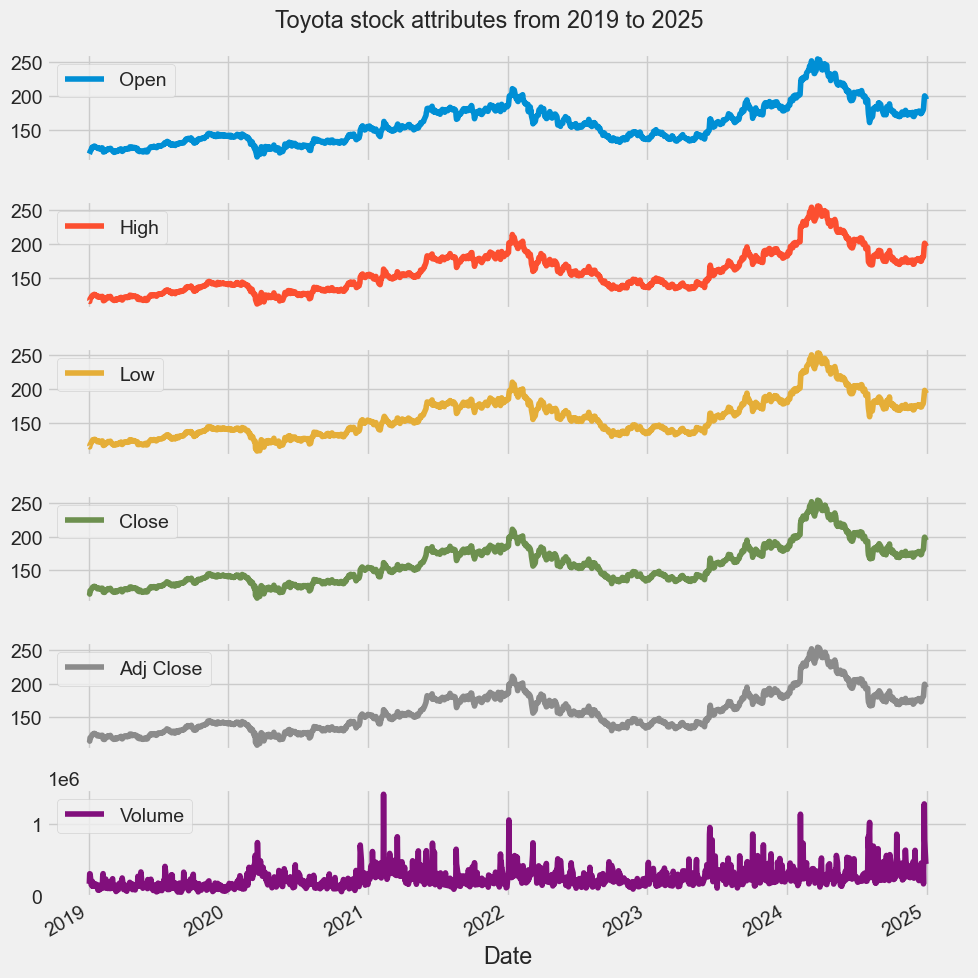

In [45]:
# Filter data for the date range and plot all columns as subplots
TM.plot(subplots=True, figsize=(10, 10), title='Toyota stock attributes from 2019 to 2025')

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
# Display Ford data
f.head(10)

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2019-01-02,7.53,8.02,7.48,7.90,5.936495,47494400,Ford
2019-01-03,7.97,7.99,7.78,7.78,5.846321,39172400,Ford
2019-01-04,7.91,8.12,7.85,8.08,6.071757,43039800,Ford
2019-01-07,8.11,8.37,8.03,8.29,6.229562,40729400,Ford
2019-01-08,8.42,8.54,8.35,8.37,6.289679,45644000,Ford
2019-01-09,8.45,8.77,8.36,8.72,6.552688,48404900,Ford
2019-01-10,8.71,8.77,8.45,8.67,6.515115,39490400,Ford
2019-01-11,8.77,8.93,8.70,8.82,6.627833,41559900,Ford
2019-01-14,8.80,9.06,8.76,8.99,6.755581,44833800,Ford


In [49]:
f.shape

(1510, 7)

In [51]:
f.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,11.552417,11.723801,11.376132,11.550437,9.889350,6.314539e+07
std,3.352156,3.423208,3.282067,3.356256,2.961516,3.233743e+07
min,4.270000,4.420000,3.960000,4.010000,3.268044,1.188160e+07
25%,9.190000,9.272500,9.100000,9.202500,7.324294,4.296088e+07
50%,11.650000,11.855000,11.475000,11.650000,10.457009,5.536175e+07
75%,13.070000,13.275000,12.900000,13.090000,11.652042,7.493602e+07
max,24.870001,25.870001,24.370001,25.190001,20.632551,3.116452e+08


In [53]:
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1510 non-null   float64
 1   High             1510 non-null   float64
 2   Low              1510 non-null   float64
 3   Close            1510 non-null   float64
 4   Adj Close        1510 non-null   float64
 5   Volume           1510 non-null   int64  
 6   Name_Of_Company  1510 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


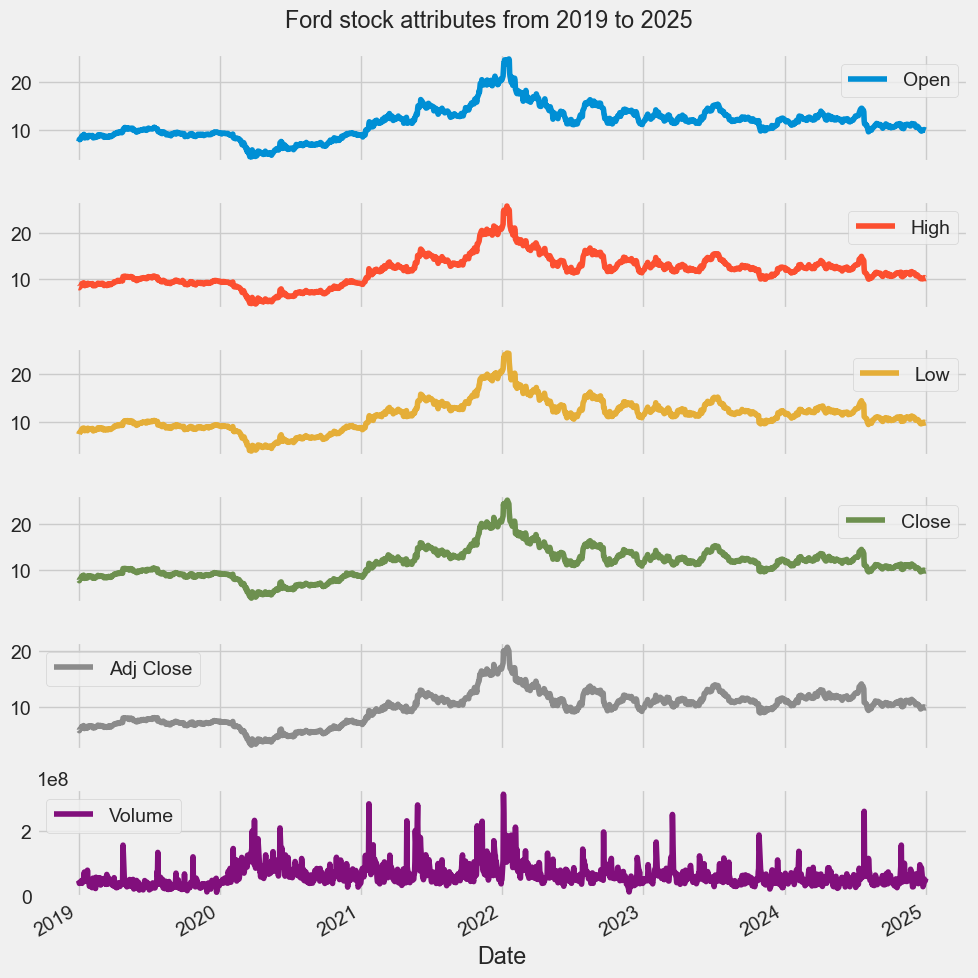

In [55]:
# Filter data for the date range and plot all columns as subplots
f.plot(subplots=True, figsize=(10, 10), title='Ford stock attributes from 2019 to 2025')

# Display the plot
plt.tight_layout()
plt.show()

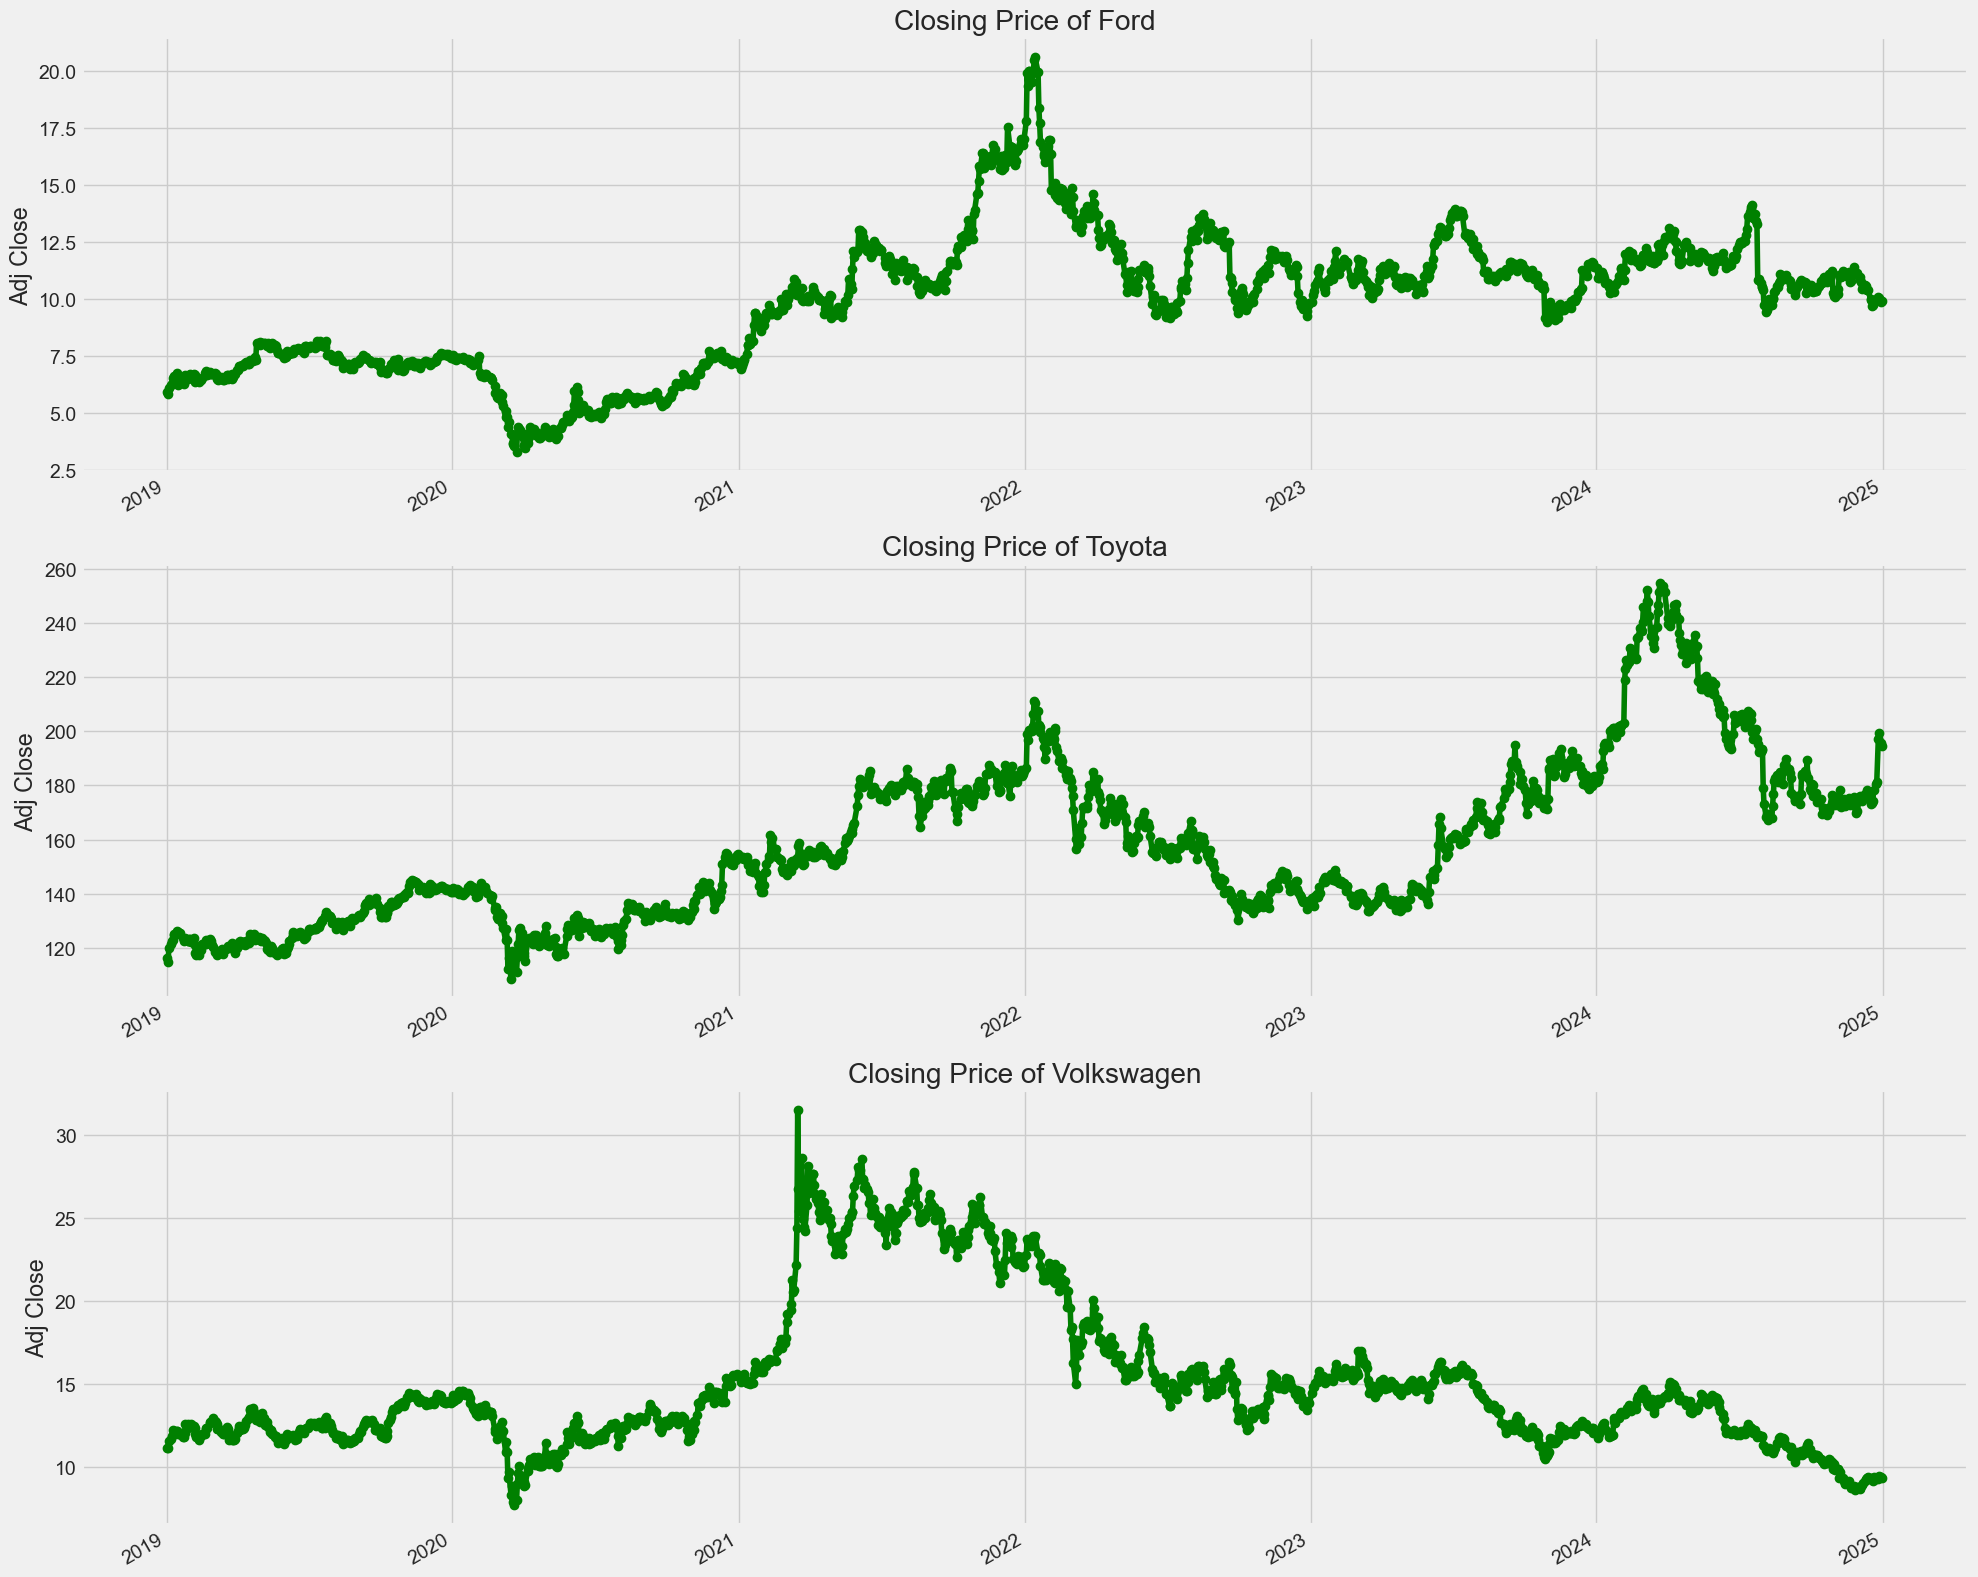

In [59]:
#Visualizing Historical Adjusted Close Prices
plt.figure(figsize=(20, 16))
#Loop Over Each Company to Create Subplots
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)     # Creates 3 subplots
    company['Adj Close'].plot(color='green', marker='o')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()
plt.show()

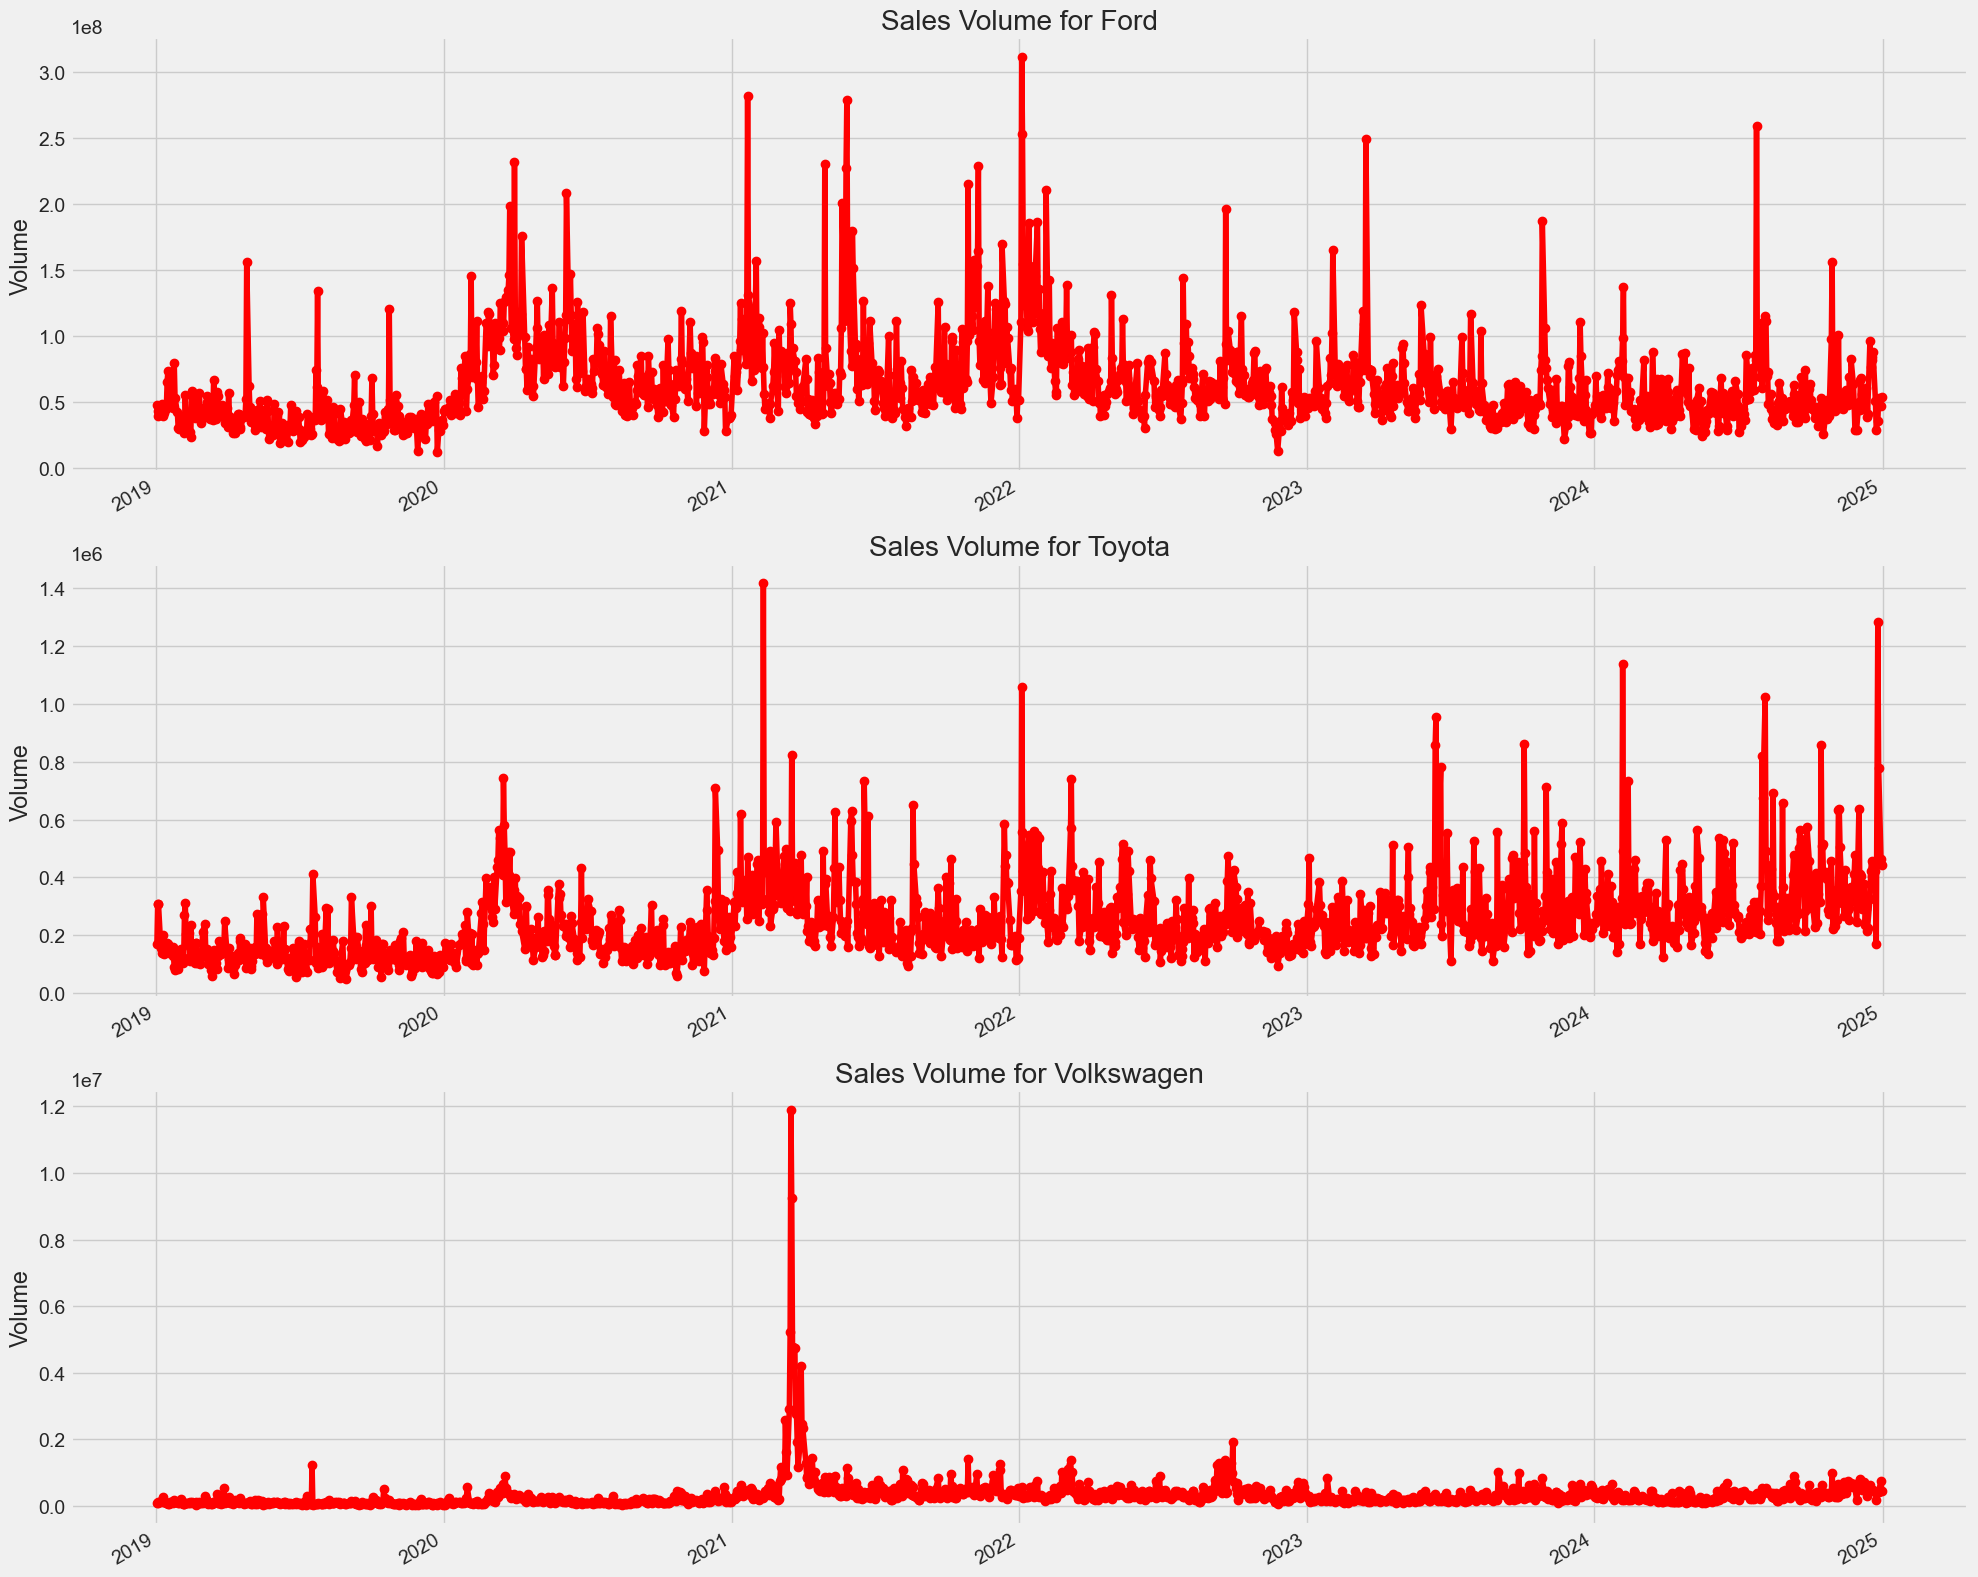

In [63]:
# Right now we can visualize the total volume of stock being traded each day
plt.figure(figsize=(20, 16))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Volume'].plot(color='red', marker='o')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()
plt.show()

In [500]:
# Filter Volkswagen stock data to include only days with more than 2 million shares traded
VWAGY[VWAGY['Volume'] > 2000000]

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2021-03-10,26.580000,29.500000,26.580000,28.590000,21.278790,2582700,Volkswagen
2021-03-15,28.379999,30.500000,28.375000,29.760000,22.149591,2898700,Volkswagen
2021-03-16,33.664001,35.000000,31.240000,32.750000,24.374969,5219500,Volkswagen
2021-03-17,34.965000,48.720001,34.459999,42.330002,31.505116,11898000,Volkswagen
2021-03-18,42.099998,42.389999,33.509998,35.950001,26.756647,9235600,Volkswagen
2021-03-19,33.959999,36.570000,32.169998,34.150002,25.416952,4769500,Volkswagen
2021-03-22,36.585999,39.700001,35.000000,38.439999,28.609886,4735700,Volkswagen
2021-03-23,36.276001,36.919998,35.356998,36.189999,26.935268,2765300,Volkswagen
2021-03-24,35.284000,35.650002,33.400002,33.490002,24.925734,2849300,Volkswagen


### Moving Average (MA) Method

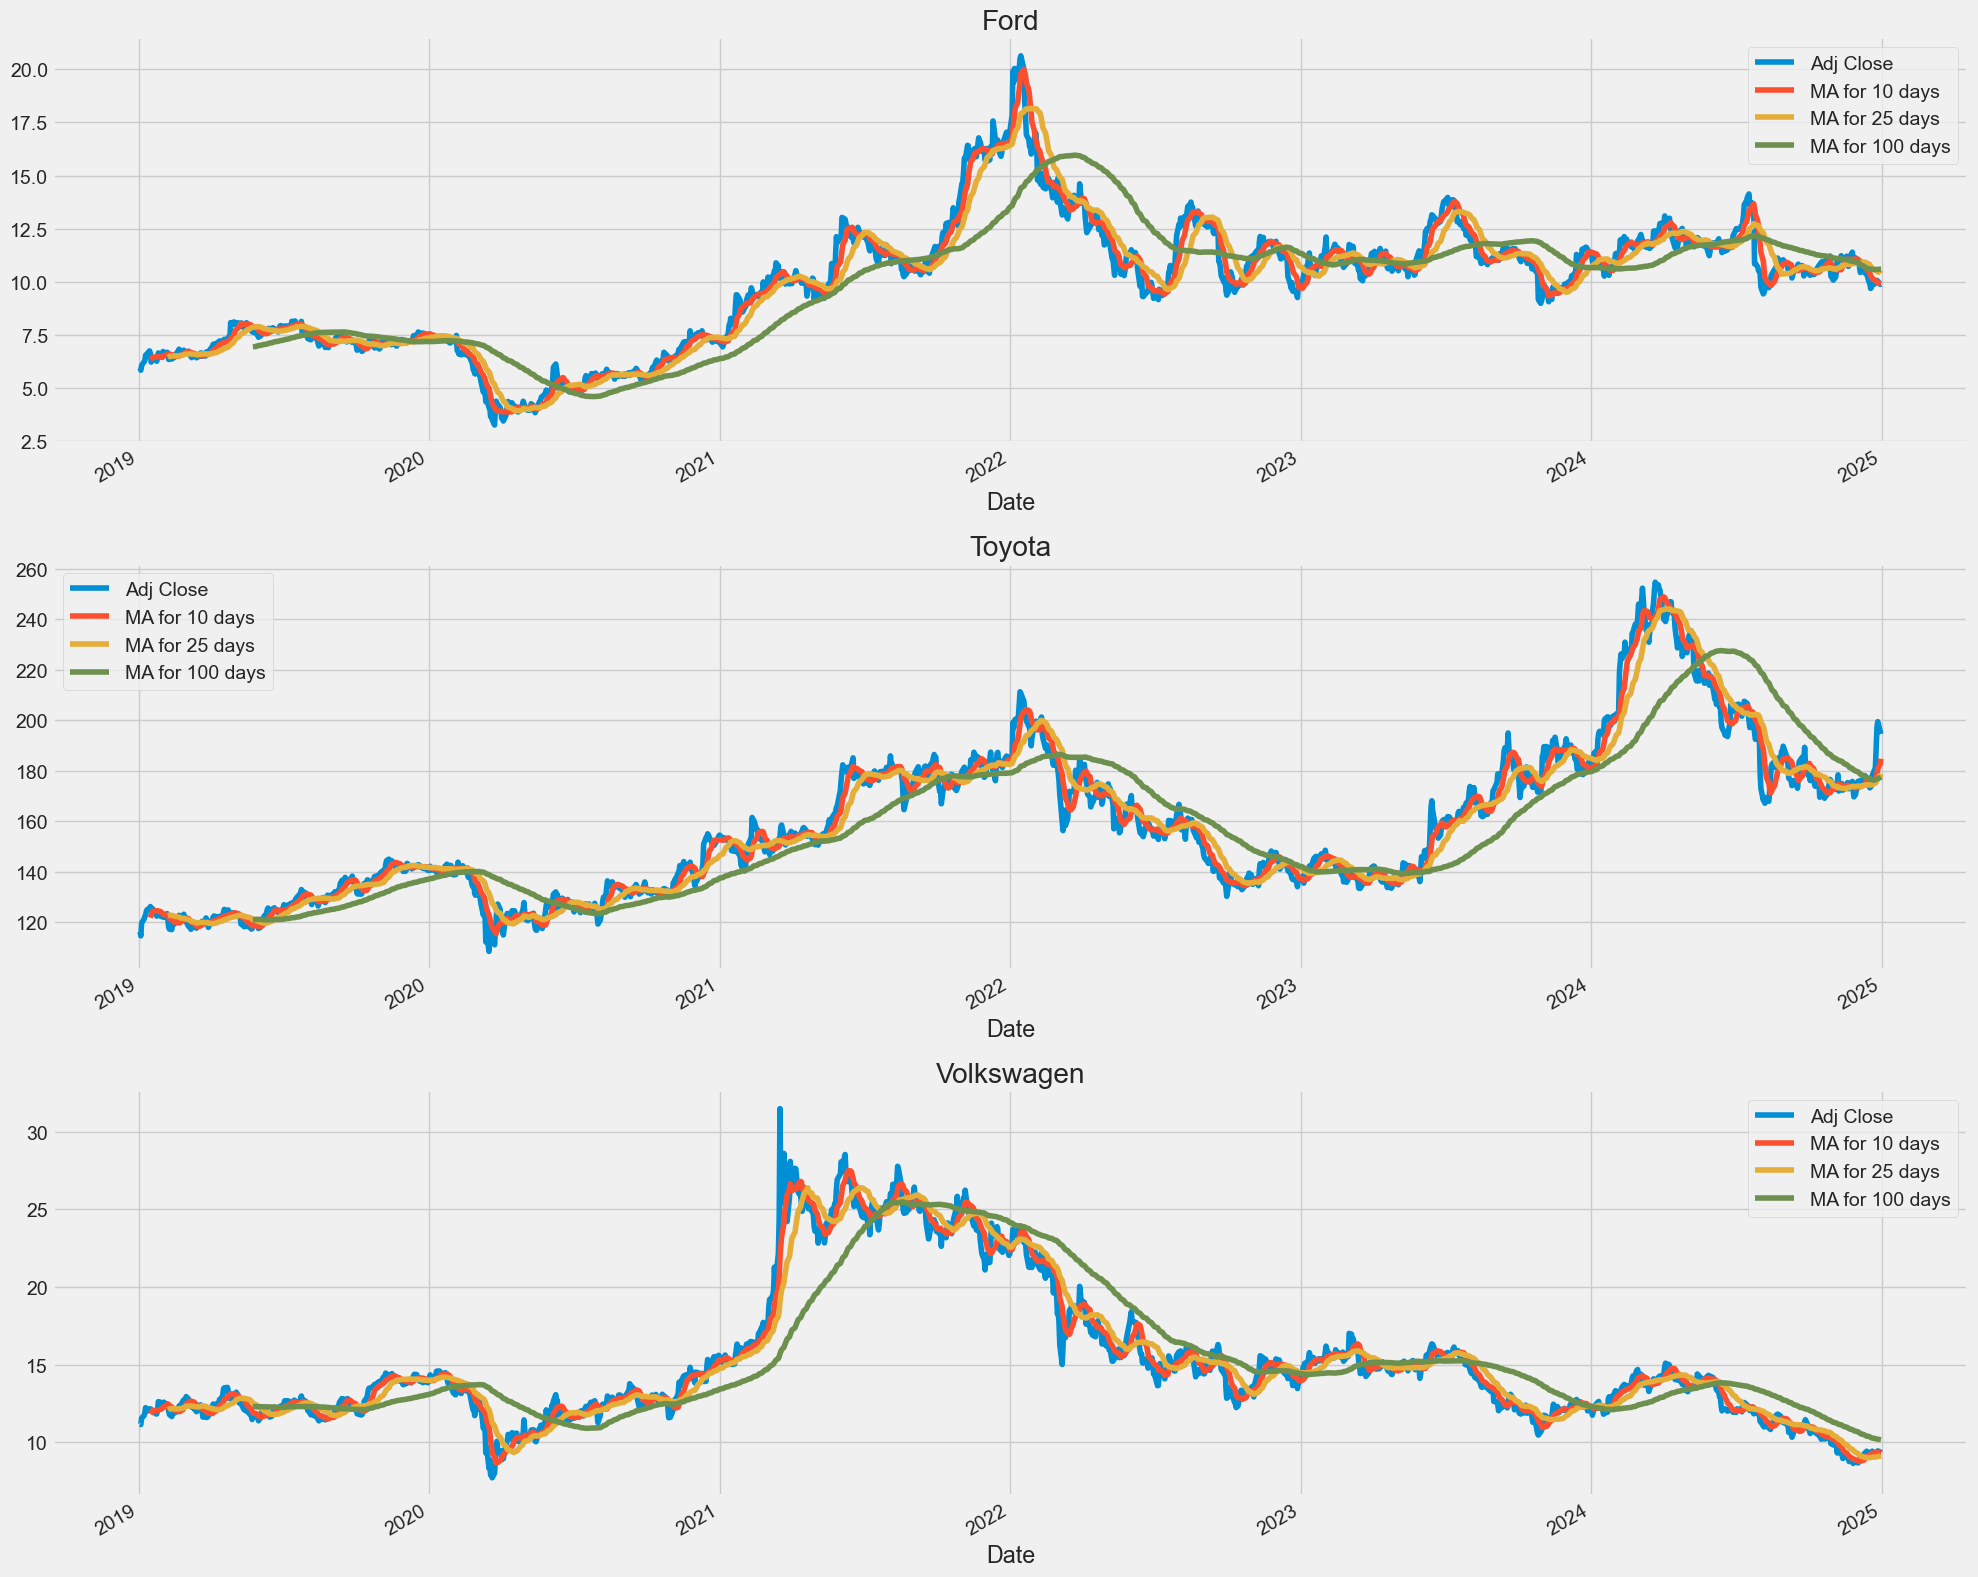

In [65]:
ma_day = [10, 25, 100]                      # List of days for calculating moving averages
fig, axes = plt.subplots(nrows=3, ncols=1)  # Creates a 3x1 grid of subplots (3 rows, 1 column)
fig.set_figheight(16)
fig.set_figwidth(20)

# Calculate moving averages
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"                              #Create a Column Name for Each Moving Average:
        company[column_name] = company['Adj Close'].rolling(ma).mean() # Calculate the moving average

# Plot using correct indexing
f[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 100 days']].plot(ax=axes[0])
axes[0].set_title(company_name[0])

TM[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 100 days']].plot(ax=axes[1])
axes[1].set_title(company_name[1])

VWAGY[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 100 days']].plot(ax=axes[2])
axes[2].set_title(company_name[2])

fig.tight_layout()
plt.show()


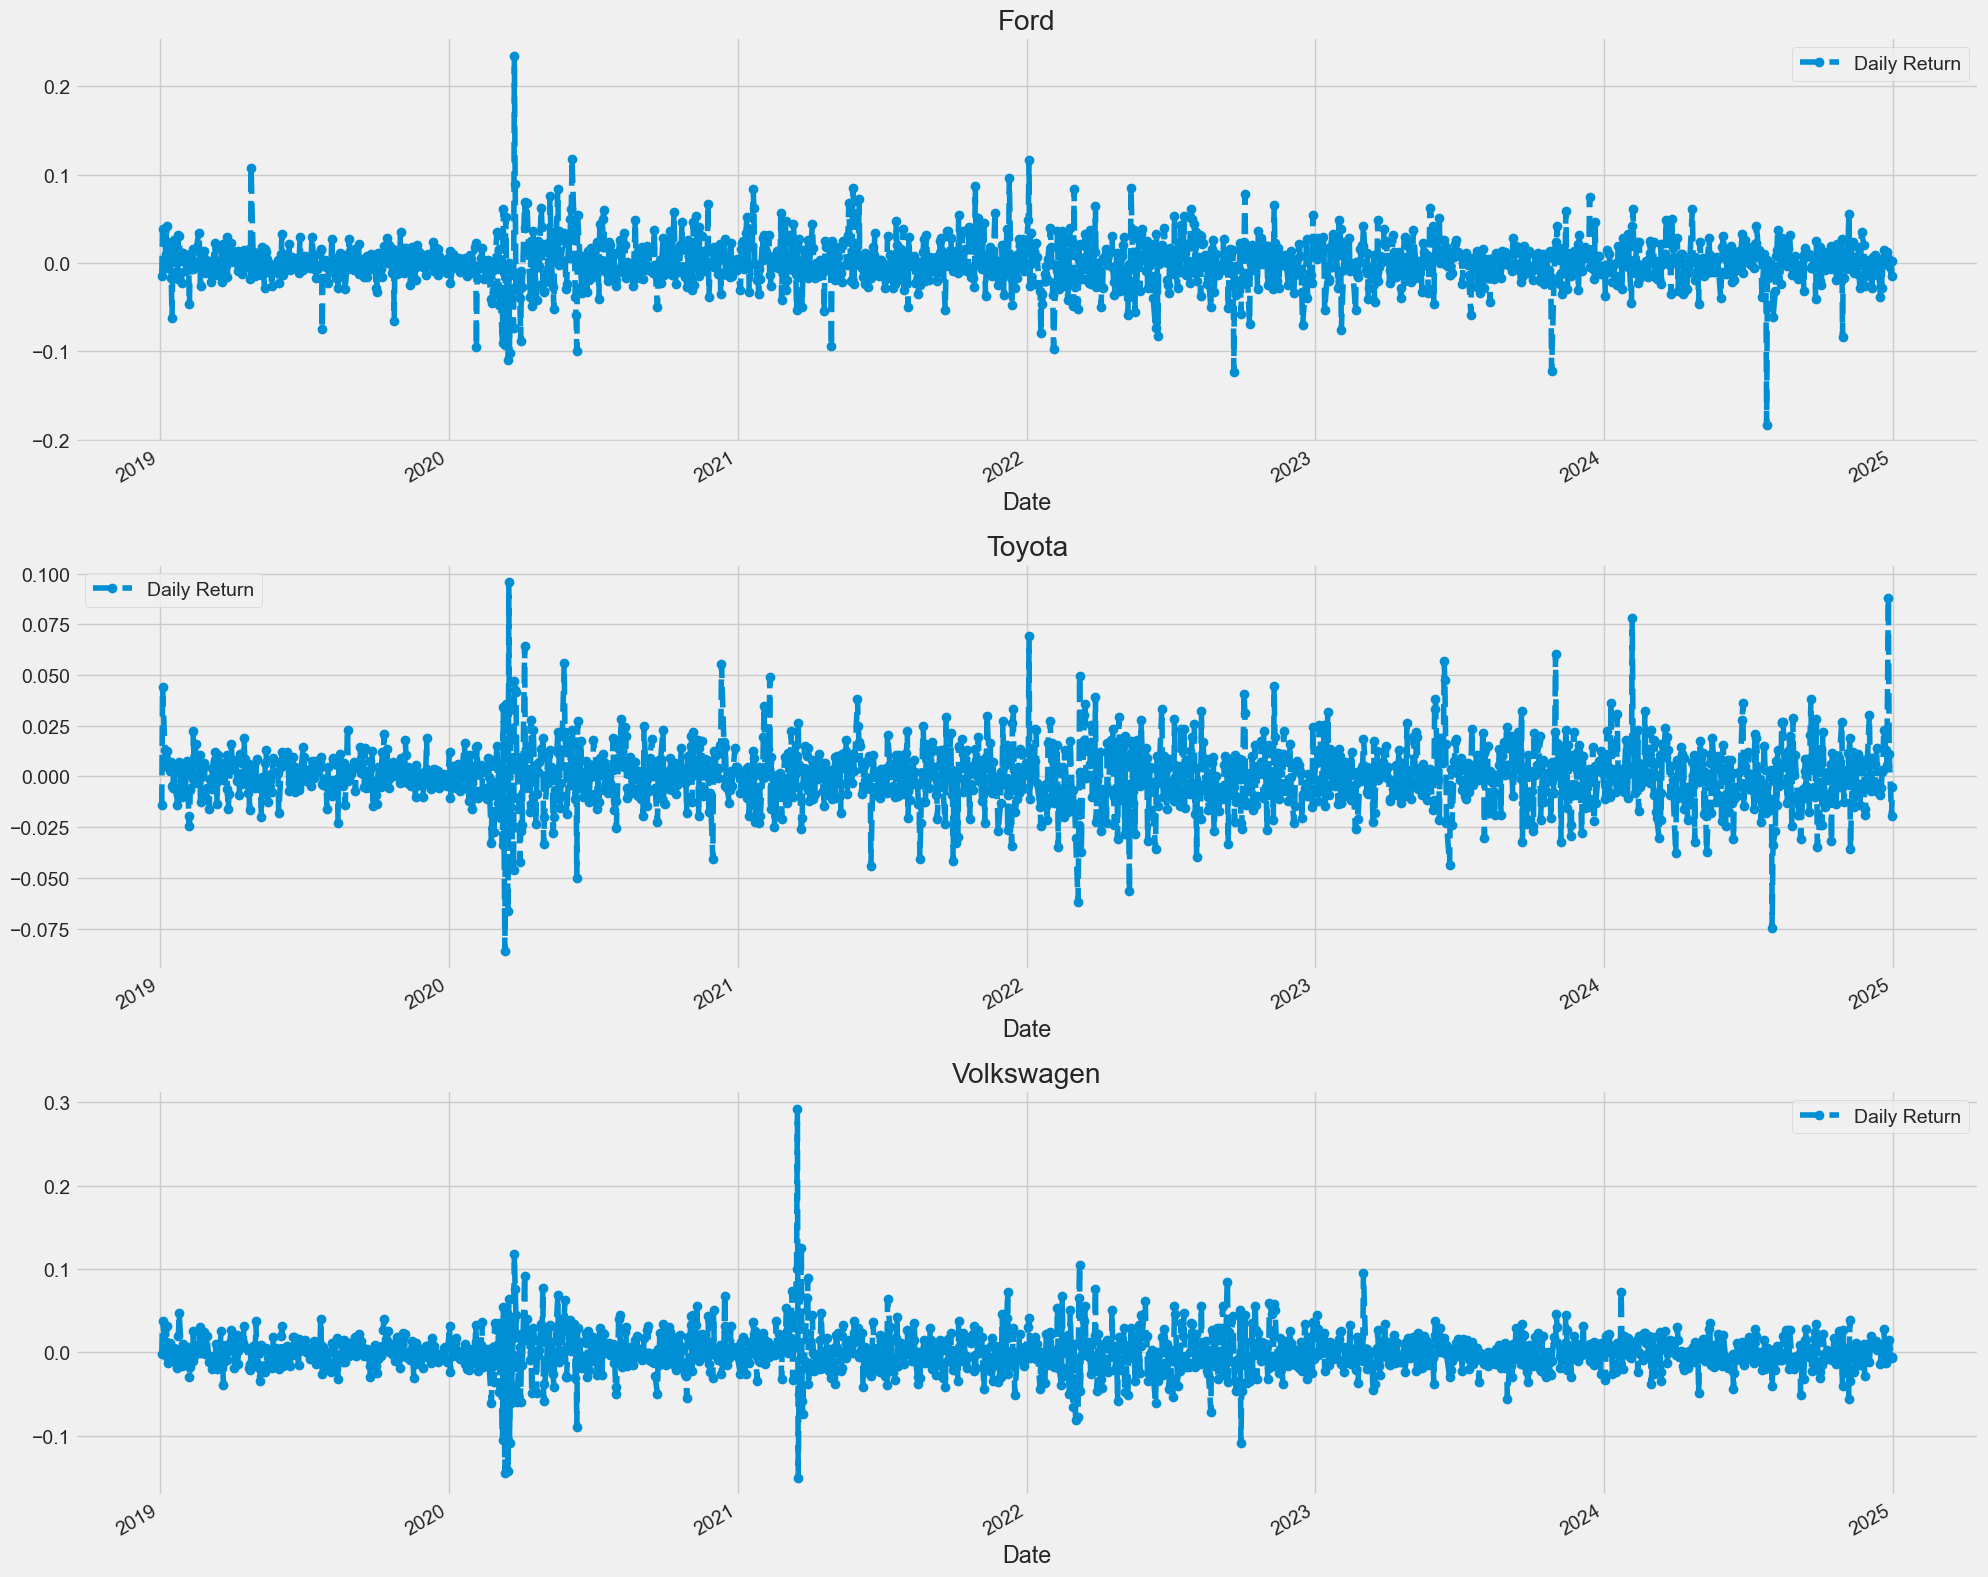

In [67]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()  # Computes the percentage change between consecutive values.

# Then we'll plot the daily return percentage
counter = 0
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(16)
fig.set_figwidth(20)

f['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title(company_name[0])

TM['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title(company_name[1])

VWAGY['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title(company_name[2])

fig.tight_layout()

The visualization shows us, some of the increament or decreament on stocks.
For example there is an outlier value in Toyota Datas. Lets dive into this.


In [69]:
TM[TM['Daily Return'] < -0.075]

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company,MA for 10 days,MA for 25 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2020-03-12,118.779999,118.779999,111.480003,112.199997,112.199997,536300,Toyota,126.734,134.0408,139.3933,-0.086245


Analysis of Outlier in Toyota's Stock Data:      
On March 12, 2020, Toyota’s stock saw a sharp drop of -8.62%, much higher than usual. This could be an outlier caused by unexpected events like market reactions to COVID-19 or other major news, leading to a significant decline in stock value for that day.

In [ ]:
#Visualizing Daily Return Distribution

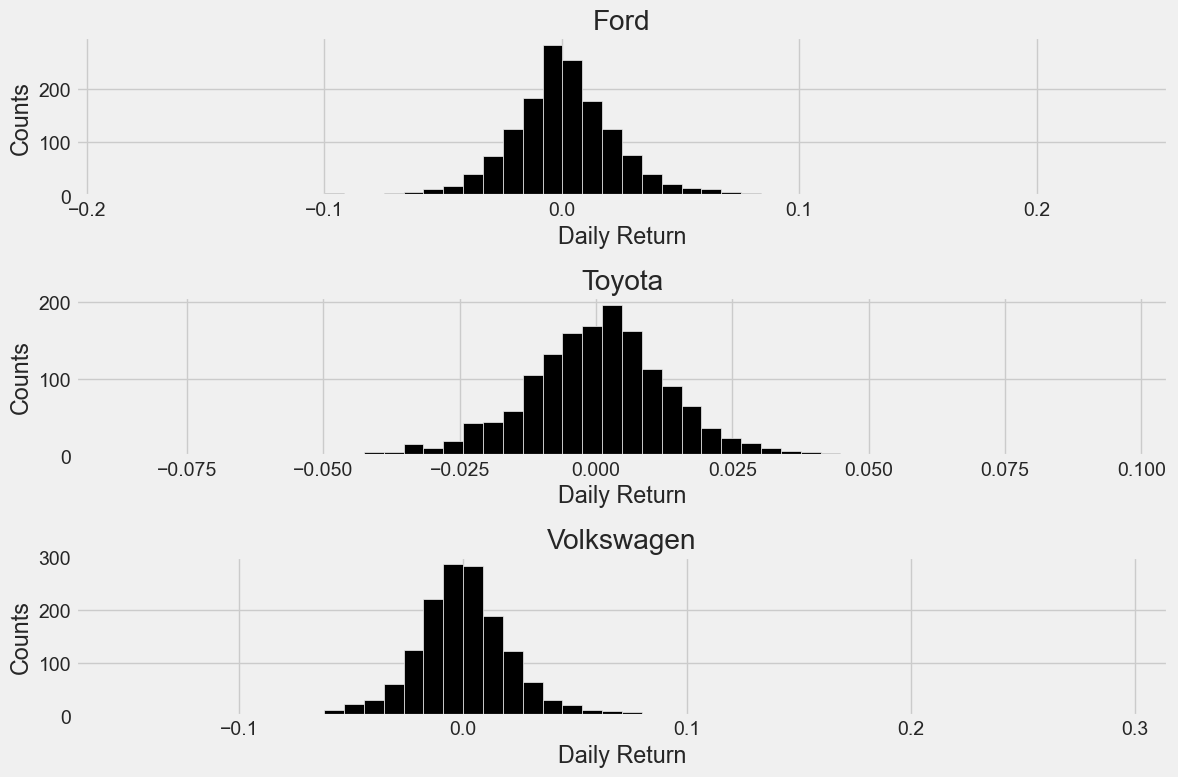

In [71]:
plt.figure(figsize=(12, 8))
# Now on, Let me visualize the histogram plot results, in order to understand Daily
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Daily Return'].hist(bins=50, color= 'black') 
    plt.xlabel('Daily Return')
    plt.ylabel('Counts') 
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()


In [73]:
import math

# Define a dictionary to store volatility results
volatility_results = {}

# Loop through each stock's data and name
for company, name in zip(company_list, company_name):
    # Calculate daily returns and add as a new column
    company['Return'] = company['Adj Close'].pct_change() * 100
    
    # Calculate Daily Volatility (standard deviation of 'Return')
    daily_volatility = company['Return'].std()
    
    # Calculate Monthly and Annual Volatility
    monthly_volatility = math.sqrt(21) * daily_volatility
    annual_volatility = math.sqrt(252) * daily_volatility
    
    # Store the results in the dictionary
    volatility_results[name] = {
        "Daily Volatility (%)": round(daily_volatility, 2),
        "Monthly Volatility (%)": round(monthly_volatility, 2),
        "Annual Volatility (%)": round(annual_volatility, 2)
    }

# Display results for each stock
for stock, volatilities in volatility_results.items():
    print(f"{stock}:")
    for vol_type, value in volatilities.items():
        print(f"  {vol_type}: {value}%")
    print()


Ford:
  Daily Volatility (%): 2.65%
  Monthly Volatility (%): 12.15%
  Annual Volatility (%): 42.1%

Toyota:
  Daily Volatility (%): 1.53%
  Monthly Volatility (%): 6.99%
  Annual Volatility (%): 24.22%

Volkswagen:
  Daily Volatility (%): 2.52%
  Monthly Volatility (%): 11.53%
  Annual Volatility (%): 39.95%



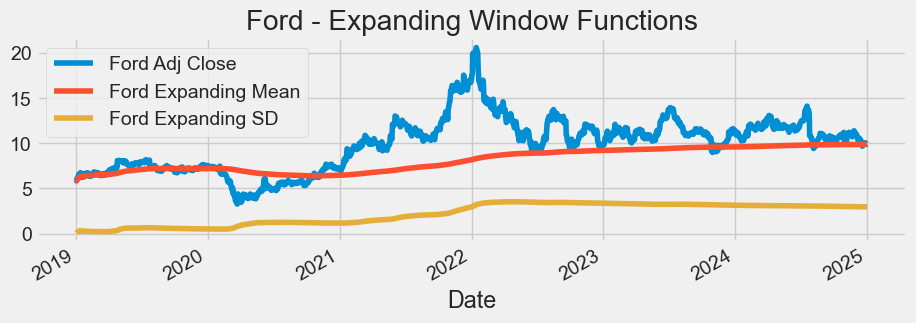

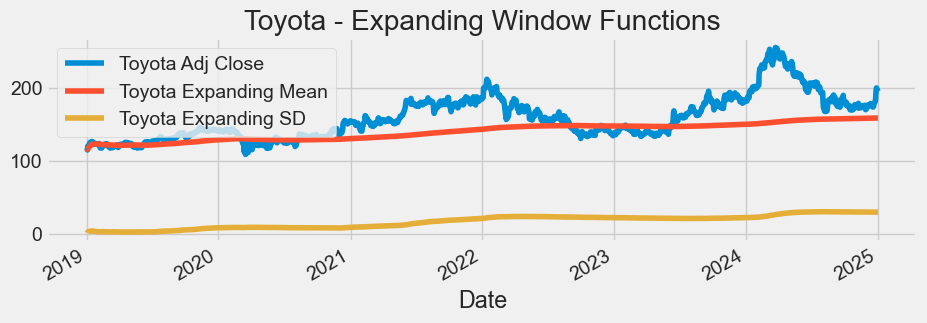

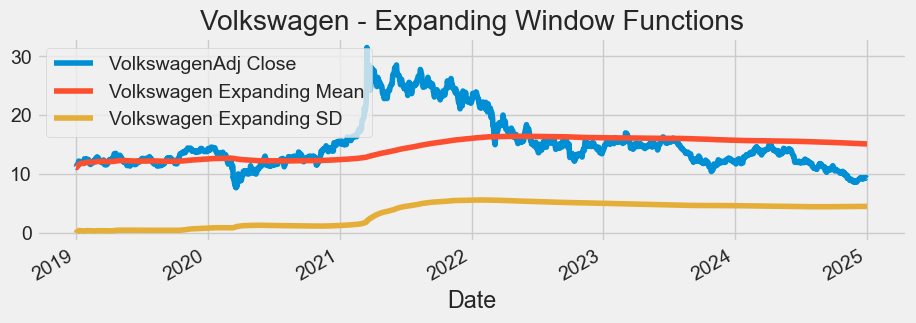

In [75]:
# Expanding window functions for Ford
ford_mean = f['Adj Close'].expanding().mean()
ford_std = f['Adj Close'].expanding().std()

# Expanding window functions for Toyota
toyota_mean = TM['Adj Close'].expanding().mean()
toyota_std = TM['Adj Close'].expanding().std()

# Expanding window functions for Volkswagen
volkswagen_mean = VWAGY['Adj Close'].expanding().mean()
volkswagen_std = VWAGY['Adj Close'].expanding().std()

# Plotting the results for each stock

# Ford
plt.figure(figsize=(10, 3))
f['Adj Close'].plot()
ford_mean.plot()
ford_std.plot()
plt.legend(['Ford Adj Close', 'Ford Expanding Mean', 'Ford Expanding SD'], loc='upper left')
plt.title('Ford - Expanding Window Functions')
plt.show()

# Toyota
plt.figure(figsize=(10, 3))
TM['Adj Close'].plot()
toyota_mean.plot()
toyota_std.plot()
plt.legend(['Toyota Adj Close', 'Toyota Expanding Mean', 'Toyota Expanding SD'], loc='upper left')
plt.title('Toyota - Expanding Window Functions')
plt.show()

# Volkswagen
plt.figure(figsize=(10, 3))
VWAGY['Adj Close'].plot()
volkswagen_mean.plot()
volkswagen_std.plot()
plt.legend(['VolkswagenAdj Close', 'Volkswagen Expanding Mean', 'Volkswagen Expanding SD'], loc='upper left')
plt.title('Volkswagen - Expanding Window Functions')
plt.show()


In [77]:
# Let me have all the closing prices for the car price stock list into one DataFrame.
adj_closing_df = yf.download(auto_list, start=start, end=end)['Adj Close']
adj_closing_df.head(10)


[*********************100%***********************]  3 of 3 completed


,F,TM,VWAGY
Date,,,
2019-01-02,5.936495,116.279999,11.152326
2019-01-03,5.846321,114.650002,11.132152
2019-01-04,6.071757,119.730003,11.542852
2019-01-07,6.229562,121.279999,11.702810
2019-01-08,6.289679,122.309998,11.848356
2019-01-09,6.552690,122.919998,12.220147
2019-01-10,6.515115,124.489998,12.155302
2019-01-11,6.627833,125.070000,12.003989
2019-01-14,6.755581,125.389999,12.140892


In [81]:
# Calculating daily returns
auto_returns = adj_closing_df.pct_change()
auto_returns.head(10)

,F,TM,VWAGY
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.015190,-0.014018,-0.001809
2019-01-04,0.038560,0.044309,0.036893
2019-01-07,0.025990,0.012946,0.013858
2019-01-08,0.009650,0.008493,0.012437
2019-01-09,0.041816,0.004987,0.031379
2019-01-10,-0.005734,0.012773,-0.005306
2019-01-11,0.017301,0.004659,-0.012448
2019-01-14,0.019274,0.002559,0.011405


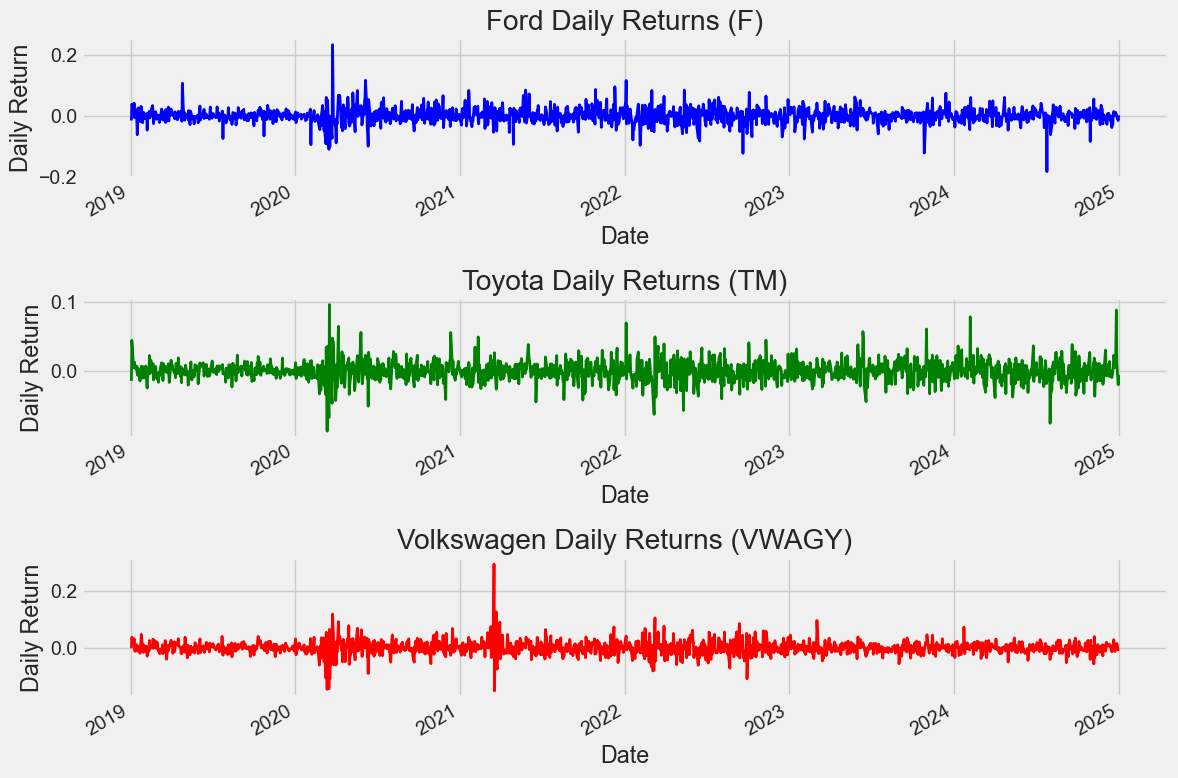

In [83]:
import matplotlib.pyplot as plt

# Plotting daily returns for each stock separately
plt.figure(figsize=(12, 8))

# Plot for Ford (F)
plt.subplot(3, 1, 1)
auto_returns['F'].plot(label='Ford Daily Returns', color='blue', linewidth=2)
plt.title('Ford Daily Returns (F)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

# Plot for Toyota (TM)
plt.subplot(3, 1, 2)
auto_returns['TM'].plot(label='Toyota Daily Returns', color='green', linewidth=2)
plt.title('Toyota Daily Returns (TM)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

# Plot for Volkswagen (VWAGY)
plt.subplot(3, 1, 3)
auto_returns['VWAGY'].plot(label='Volkswagen Daily Returns', color='red', linewidth=2)
plt.title('Volkswagen Daily Returns (VWAGY)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

<Figure size 800x400 with 0 Axes>

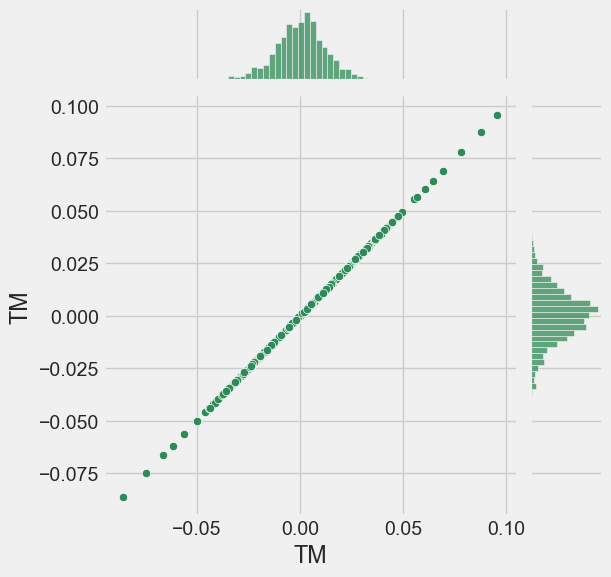

In [85]:
# Comparing Toyota to itself should show a perfectly linear relationship.
plt.figure(figsize=(8, 4))
#comparing Toyota returns to Toyota returns
sns.jointplot(x='TM', y='TM', data=auto_returns, kind='scatter', color='seagreen')

# Display the plot
plt.show()

<Figure size 800x400 with 0 Axes>

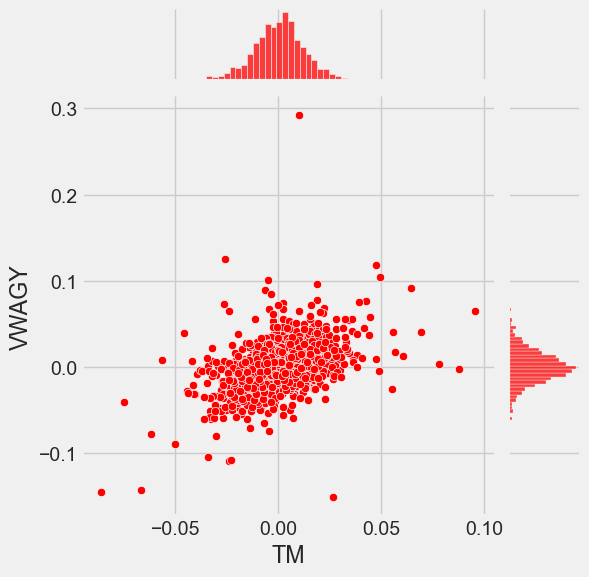

In [87]:
#We'll use joinplot to compare the daily returns of Toyota and Volkswagen
plt.figure(figsize=(8, 4))
#comparing Toyota returns to Volkswagen returns
sns.jointplot(x='TM', y='VWAGY', data=auto_returns, kind='scatter', color='red')

# Display the plot
plt.show()

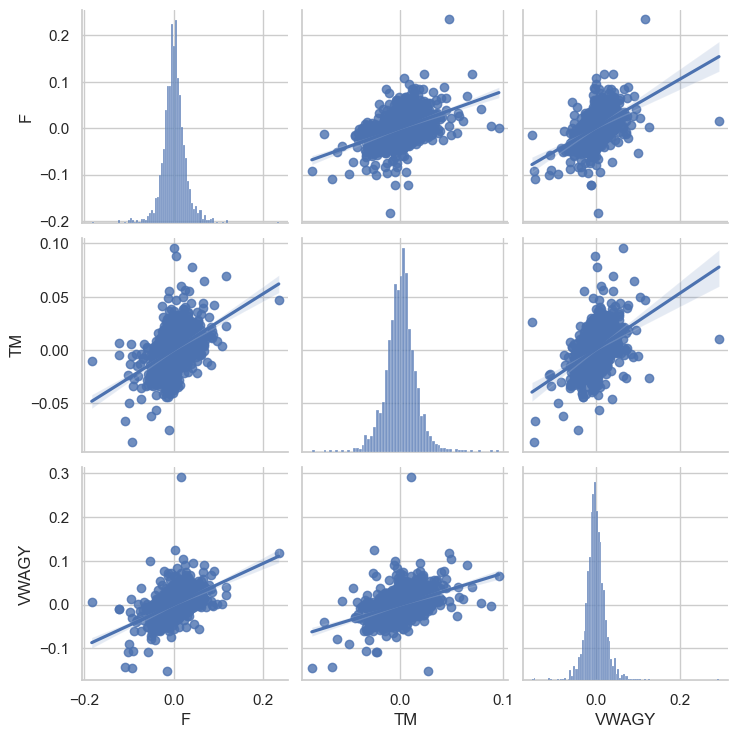

In [521]:
# To plot multiple pairwise bivariate distributions in a dataset, we can use the pairplot.

# This visualization tool shows us the relation between the companies stocks.

# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

sns.pairplot(auto_returns,kind='reg')  # Add regression lines

In [522]:
#Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

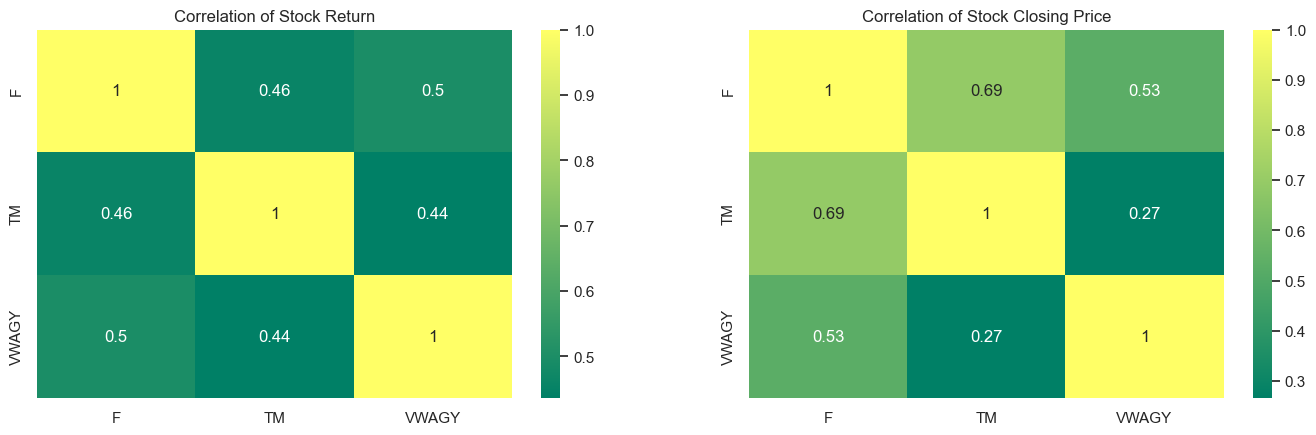

In [523]:
#heatmaps to visualize the correlation between stock returns and closing prices for the companies
plt.figure(figsize=(15, 10))

#Correlation of Stock Returns
plt.subplot(2, 2, 1)
sns.heatmap(auto_returns.corr(), annot=True, cmap='summer') 
plt.title('Correlation of Stock Return')
#Correlation of Stock Closing Prices
plt.subplot(2, 2, 2)
sns.heatmap(adj_closing_df.corr(), annot=True, cmap='summer') 
plt.title('Correlation of Stock Closing Price')


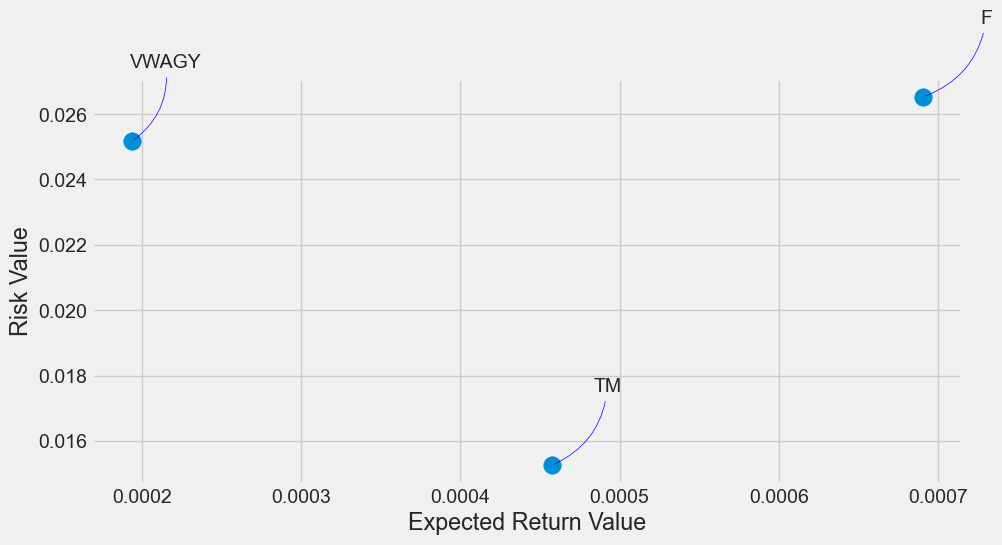

In [89]:
#calculate the risk of the stock market price.

#comparing the expected return with the standard deviation of the daily returns
returns= auto_returns.dropna() 
area= np.pi * 50            #Calculate Area for the Scatter Plot:

plt.figure(figsize=(10, 5)) 
plt.scatter(returns.mean(), returns.std(), s=area) 
plt.xlabel('Expected Return Value') 
plt.ylabel('Risk Value')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


### Let's Predict Toyota Stock Market Price

In [107]:
# Get the last 10 years stock data
df_tm = yf.download('TM', start=datetime(end.year - 10, end.month, end.day), end=datetime.now())
df_tm

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,126.230003,126.639999,124.889999,125.669998,118.139427,250000
2015-01-05,124.440002,124.610001,123.050003,123.370003,115.977249,240600
2015-01-06,123.400002,123.720001,121.209999,122.099998,114.783348,285600
2015-01-07,125.519997,126.059998,125.059998,125.169998,117.669388,385700
2015-01-08,126.449997,127.699997,126.449997,127.580002,119.934975,498800
...,...,...,...,...,...,...
2025-01-27,186.800003,187.059998,185.820007,186.500000,186.500000,308100
2025-01-28,186.149994,186.399994,184.149994,185.289993,185.289993,382600
2025-01-29,187.619995,188.039993,186.479996,186.979996,186.979996,258200


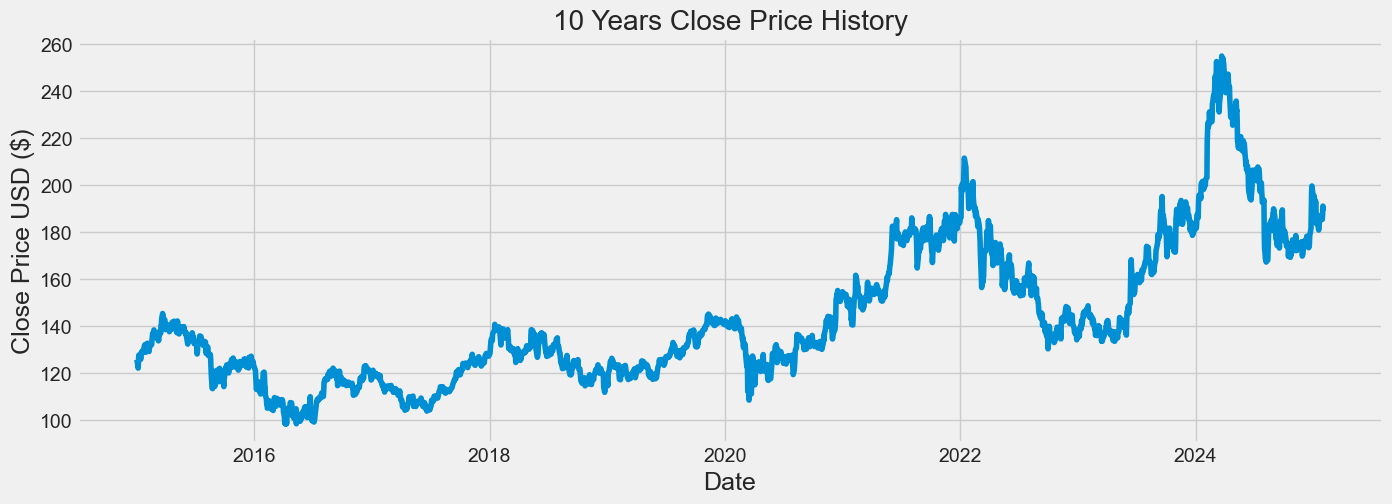

In [109]:
# In this prediction, I will work on Close price, so let's visualize the Close Price
plt.figure(figsize=(15, 5))
plt.title('10 Years Close Price History')
plt.plot(df_tm['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [111]:
# Step 1: Create a new dataframe with only the Close column
data_tm = df_tm.filter(['Close'])

# Step 2: Convert the data_tm to a numpy array with values method.
dataset_tm = data_tm.values

In [113]:
dataset_tm

array([[125.66999817],
       [123.37000275],
       [122.09999847],
       ...,
       [186.97999573],
       [190.97000122],
       [188.92999268]])

In [115]:
len(dataset_tm)

2536

In [117]:
# Step 3: Get the 80% of data as training data (number of rows to train model)
training_data_len_tm = int(np.ceil(len(dataset_tm) * .8))

training_data_len_tm 

2029

In [119]:
from sklearn.preprocessing import MinMaxScaler

# Step 4: Scaled all data between 0 and 1 (Normalise the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_tm = scaler.fit_transform(dataset_tm)     # Apply scaling to the data


scaled_data_tm[:10]

array([[0.17507987],
       [0.16038342],
       [0.15226837],
       [0.17188499],
       [0.18728437],
       [0.1776997 ],
       [0.17744411],
       [0.17980834],
       [0.17603835],
       [0.18217253]])

In [121]:
# Create the scaled training data set
train_data_tm = scaled_data_tm[0:int(training_data_len_tm), :]

# Split the training data into x train and y_train data sets
x_train = []
y_train = []
# Creating a data structure with 60 time-steps and 1 output
for i in range(60, len(train_data_tm)):
    x_train.append(train_data_tm[i-60:i, 0])   # last 60 days of data
    y_train.append(train_data_tm[i, 0])          # Next day's price
    if i<= 61:                # only the first two sequences are printed.
        print(x_train)
        print(y_train)
        print()


[array([0.17507987, 0.16038342, 0.15226837, 0.17188499, 0.18728437,
       0.1776997 , 0.17744411, 0.17980834, 0.17603835, 0.18217253,
       0.1955911 , 0.19738023, 0.19418534, 0.20185305, 0.20057511,
       0.2146326 , 0.20977641, 0.20881788, 0.21648559, 0.19539941,
       0.20971245, 0.20977641, 0.21987217, 0.21386586, 0.20000006,
       0.19738023, 0.20817896, 0.20926521, 0.21437705, 0.21865819,
       0.21603836, 0.22932911, 0.23648563, 0.24683703, 0.24734822,
       0.25603832, 0.24664535, 0.24619811, 0.23706068, 0.24025557,
       0.23725237, 0.23801921, 0.23405748, 0.23399362, 0.2371885 ,
       0.2263259 , 0.22830672, 0.25086262, 0.24217252, 0.25079876,
       0.2472205 , 0.26715657, 0.26728439, 0.28638976, 0.30063903,
       0.29552719, 0.29099041, 0.28651758, 0.2819808 , 0.28293932])]
[0.26594249659809455]

[array([0.17507987, 0.16038342, 0.15226837, 0.17188499, 0.18728437,
       0.1776997 , 0.17744411, 0.17980834, 0.17603835, 0.18217253,
       0.1955911 , 0.19738023, 0.19

In [123]:
# Convert the x_train and y_train to numpy arrays for training LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data as LSTM expects 3-D data (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1969, 60, 1)

### Long Short Term Memory(LSTM)

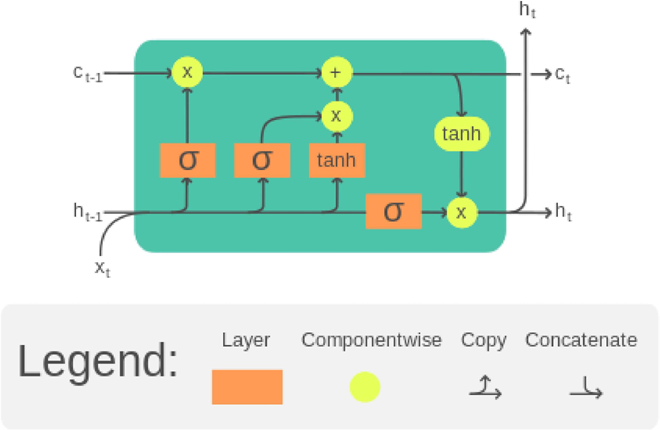

In [125]:
x_train.shape

(1969, 60, 1)

In [133]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Model Creation
model= Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout after first LSTM
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))  # Dropout after second LSTM
model.add(Dense(1))            # Adding the output layer

# Model Compilation (Compiling the RNN)
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Model Training (Fitting the RNN to the Training set)
model.fit(x_train, y_train, batch_size=64, epochs=10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0142
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0011
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0012
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0011
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0010
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 9.8649e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 9.1417e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 9.5691e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 9.4440e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 8.9088e-04


In [139]:
print(y_test.shape, predictions_tm.shape)

(507, 1) (507, 1)


In [141]:
print("training_data_len_tm:", training_data_len_tm)
print("test_data_tm.shape:", test_data_tm.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)
print("predictions_tm.shape:", predictions_tm.shape)

training_data_len_tm: 2029
test_data_tm.shape: (567, 1)
x_test.shape: (507, 60, 1)
y_test.shape: (507, 1)
predictions_tm.shape: (507, 1)


In [135]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data_tm = scaled_data_tm[training_data_len_tm - 60:, :]

# Create the data sets x_test and y_test (spliting in x test and y test )
x_test = []
y_test = dataset_tm[training_data_len_tm:, :]

#filling x_test dataset
for i in range(60, len(test_data_tm)):
    x_test.append(test_data_tm[i-60:i, :])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [137]:
# Get the models predicted price values
predictions_tm = model.predict(x_test)
predictions_tm = scaler.inverse_transform(predictions_tm)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_test - predictions_tm) ** 2)))
rmse

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


6.158841866093444

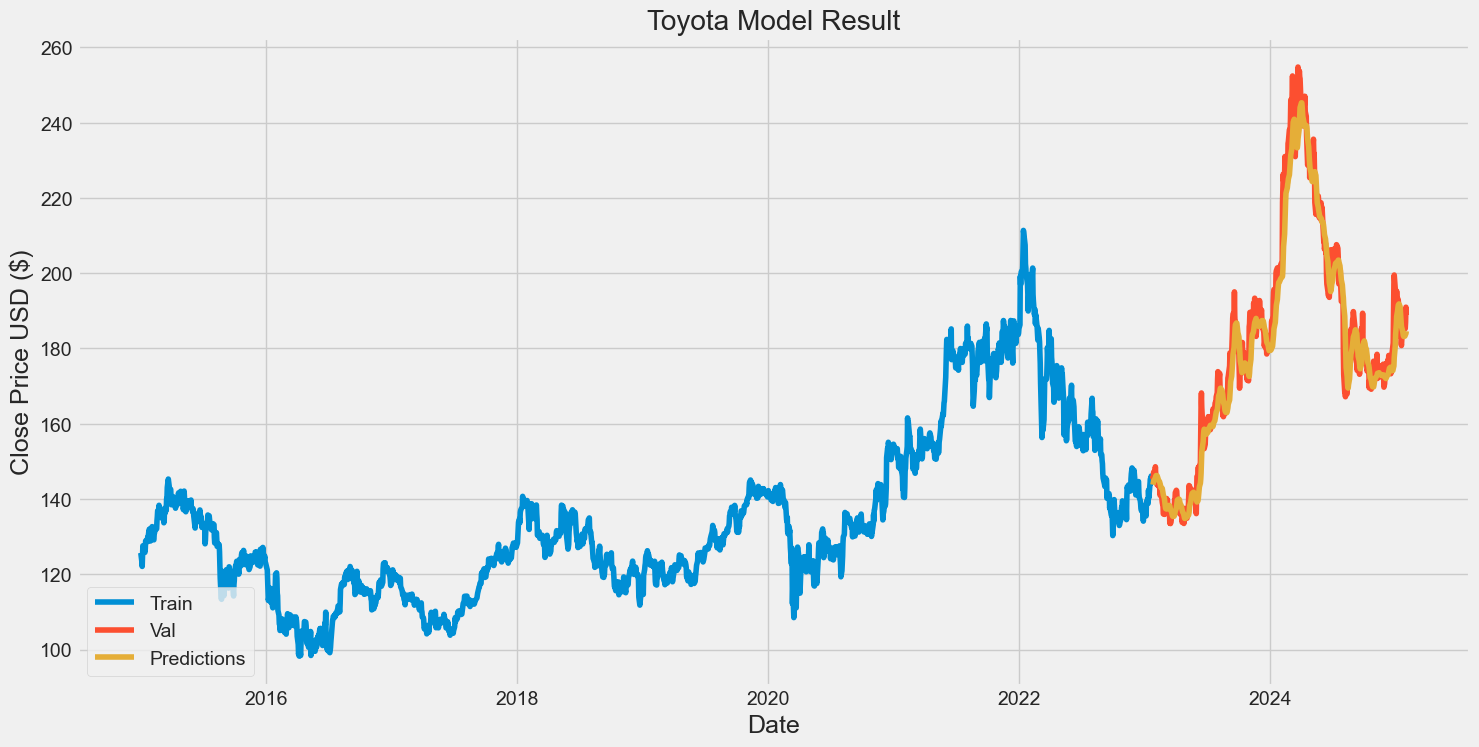

In [143]:
train = data_tm[:training_data_len_tm]
valid = data_tm[training_data_len_tm:]
valid['Predictions'] = predictions_tm
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Toyota Model Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

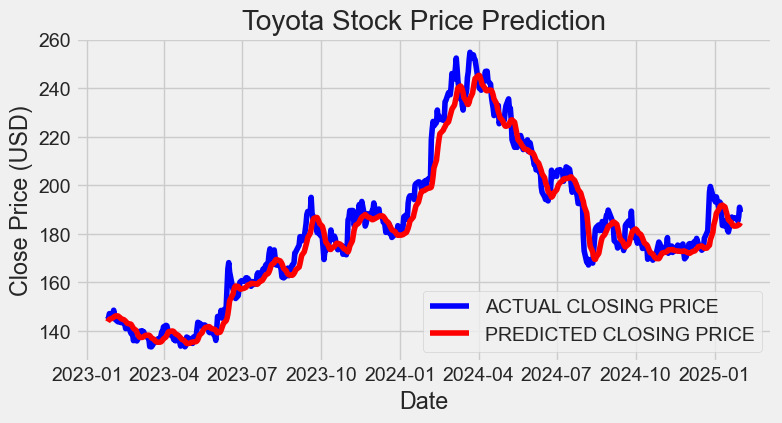

In [145]:
# Visualizing actual vs. predicted closing prices for Toyota stock
plt.figure(figsize=(8, 4))
plt.plot(valid.index, valid['Close'], label='ACTUAL CLOSING PRICE', color='blue')
plt.plot(valid.index, valid['Predictions'], label='PREDICTED CLOSING PRICE', color='red')
plt.legend(loc='lower right')
plt.title('Toyota Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()


In [147]:
# Show the valid and predicted prices
valid[-20:]

,Close,Predictions
Date,,
2025-01-02,193.119995,186.405609
2025-01-03,195.250000,188.468887
2025-01-06,190.389999,190.158890
2025-01-07,193.119995,191.040848
2025-01-08,192.550003,191.595825
2025-01-10,183.470001,191.841766
2025-01-13,183.250000,191.098480
2025-01-14,185.410004,189.822510
2025-01-15,184.839996,188.513855


In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate errors
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
mse = mean_squared_error(valid['Close'], valid['Predictions'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 4.534704264804456
Mean Squared Error (MSE): 37.93133313154537
Root Mean Squared Error (RMSE): 6.158841866093444


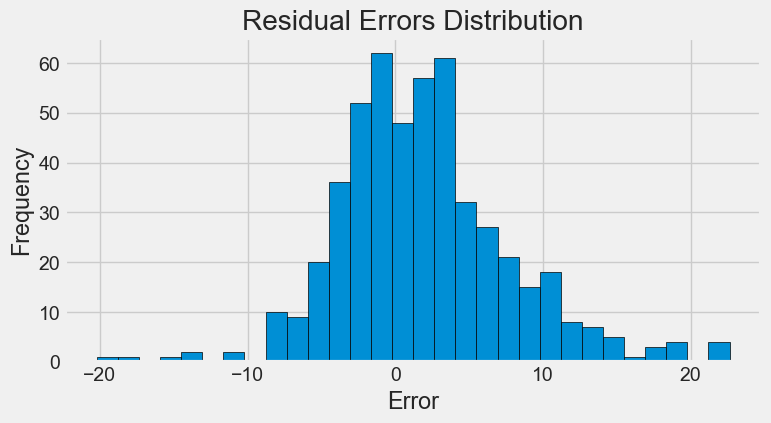

In [151]:
residuals = valid['Close'] - valid['Predictions']
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residual Errors Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [153]:
# Prepare the last 60 days of data as input for future prediction
last_60_days = df_tm['Close'][-60:].values.reshape(-1, 1)
scaled_last_60_days = scaler.transform(last_60_days)  # Normalize

x_future = []
x_future.append(scaled_last_60_days)
x_future = np.array(x_future)
x_future = np.reshape(x_future, (x_future.shape[0], x_future.shape[1], 1))

# Predict the next day's stock price
future_prediction = model.predict(x_future)
future_prediction = scaler.inverse_transform(future_prediction)
print(f"Predicted Toyota Stock Price for Next Day: {future_prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Toyota Stock Price for Next Day: 185.2273406982422
